<a href="https://colab.research.google.com/github/VinayProgram/pytorch/blob/main/machine_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [78]:
import torch
from torch import nn #nn contains all the neural networks
import matplotlib.pyplot as plt

weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step)
# That formula

# 𝑌
# =
# weight
# ×
# 𝑋
# +
# bias
# Y=weight×X+bias
# is the equation of a straight line in its slope-intercept form — just expressed in machine learning terms.

# Names in different contexts
# Math / Geometry: Slope–Intercept Form →
# 𝑦
# =
# 𝑚
# 𝑥
# +
# 𝑏
# y=mx+b

# 𝑚
# m = slope of the line

# 𝑏
# b = y-intercept

# Machine Learning: Linear Model

# weight (or
# 𝑤
# w) = slope (controls how much X affects Y)

# bias (or
# 𝑏
# b) = intercept (shifts the line up or down)

# Together, weight + bias are model parameters.

# Neural Networks: Linear transformation or affine transformation

# Often written as:

# 𝑦
# =
# 𝑊
# 𝑥
# +
# 𝑏
# y=Wx+b
# when dealing with multiple inputs.

Y = weight * X + bias
train_split = int(0.8 * len(X))
X_train , Y_train = X[:train_split], Y[:train_split]
X_test , Y_test = X[train_split:], Y[train_split:]




In [79]:
def plot_predictions(train_data=X_train,
                     train_labels=Y_train,
                     test_data=X_test,
                      test_labels=Y_test,
                     predictions=None
                     ):
  """
  Plots training data and test data comparison
  """
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data")
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="Predictions")

  plt.legend(prop={"size":14});

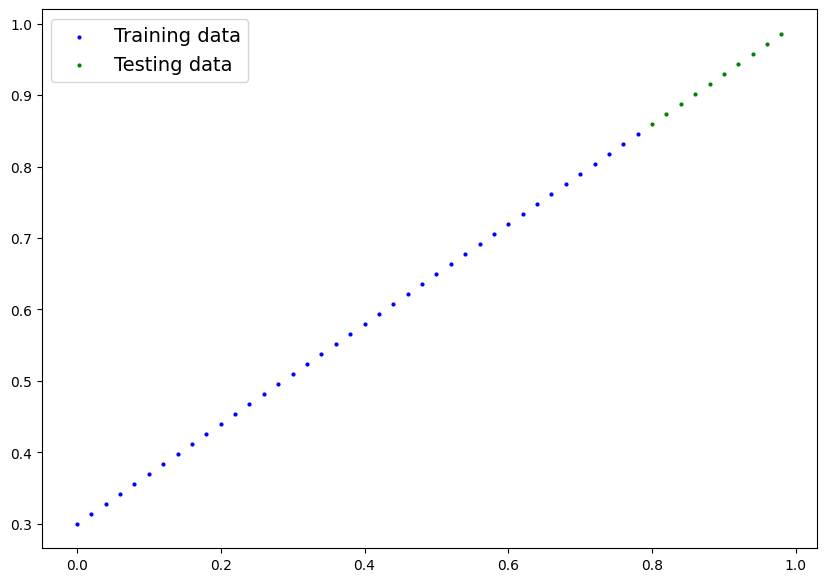

In [80]:
plot_predictions()

In [81]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(
        torch.randn(
            1,requires_grad=True,
            dtype=torch.float)
        )

    self.bias = nn.Parameter(
        torch.randn(
            1,requires_grad=True,
            dtype=torch.float)
        )
    #this is compoulsory always in every modeule
  def forward(self,x:torch.Tensor)->torch.Tensor:
      return self.weights*x+self.bias

tensor([0.3982, 0.4049, 0.4116, 0.4184, 0.4251, 0.4318, 0.4386, 0.4453, 0.4520,
        0.4588])


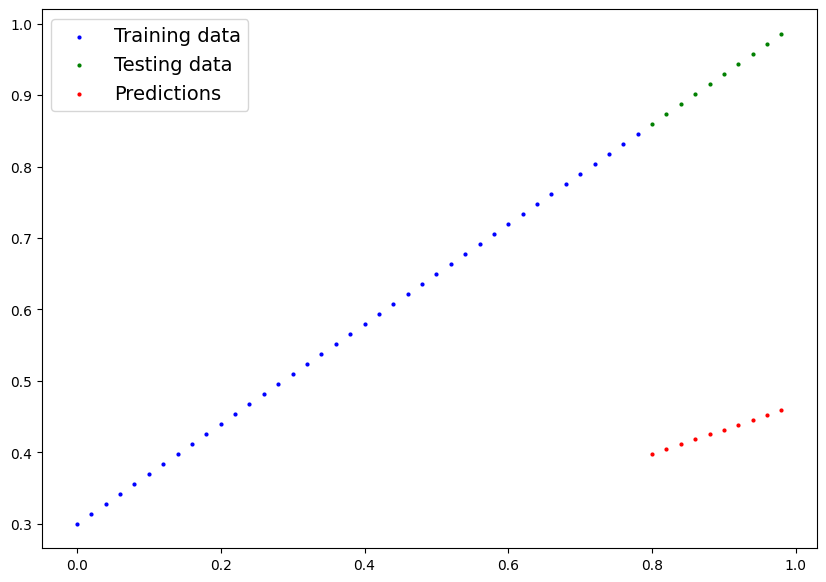

In [82]:
# ### pytorch model building esenntials
# torch.nn contains all of the building for the computantiol graph (a graph is also called as computioanal graph)
# ###
# If the above sounds complex, think of like this, almost everything in a PyTorch neural network comes from torch.nn,

# nn.Module contains the larger building blocks (layers)
# nn.Parameter contains the smaller parameters like weights and biases (put these together to make nn.Module(s))
# forward() tells the larger blocks how to make calculations on inputs (tensors full of data) within nn.Module(s)
# torch.optim contains optimization methods on how to improve the parameters within nn.Parameter to better represent input data
# # Set manual seed since nn.Parameter are randomly initialized
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

with torch.inference_mode():
  y_preds = model_0(X_test)
  print(y_preds)

plot_predictions(predictions=y_preds)

In [83]:

#loss functions
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(),lr=0.001)



Epoch: 0 | MAE Train Loss: 0.02435956709086895 | MAE Test Loss: 0.05690721794962883 
Epoch: 100 | MAE Train Loss: 0.02092517353594303 | MAE Test Loss: 0.0488395169377327 
Epoch: 200 | MAE Train Loss: 0.017490629106760025 | MAE Test Loss: 0.04084048420190811 
Epoch: 300 | MAE Train Loss: 0.014056024141609669 | MAE Test Loss: 0.03277278691530228 
Epoch: 400 | MAE Train Loss: 0.010621682740747929 | MAE Test Loss: 0.0247737355530262 
Epoch: 500 | MAE Train Loss: 0.007186878472566605 | MAE Test Loss: 0.01670604944229126 
Epoch: 600 | MAE Train Loss: 0.003752306802198291 | MAE Test Loss: 0.008672690019011497 
Epoch: 700 | MAE Train Loss: 0.0003177322505507618 | MAE Test Loss: 0.0006393313524313271 
Epoch: 800 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 
Epoch: 900 | MAE Train Loss: 0.0004444979131221771 | MAE Test Loss: 0.0005780101055279374 


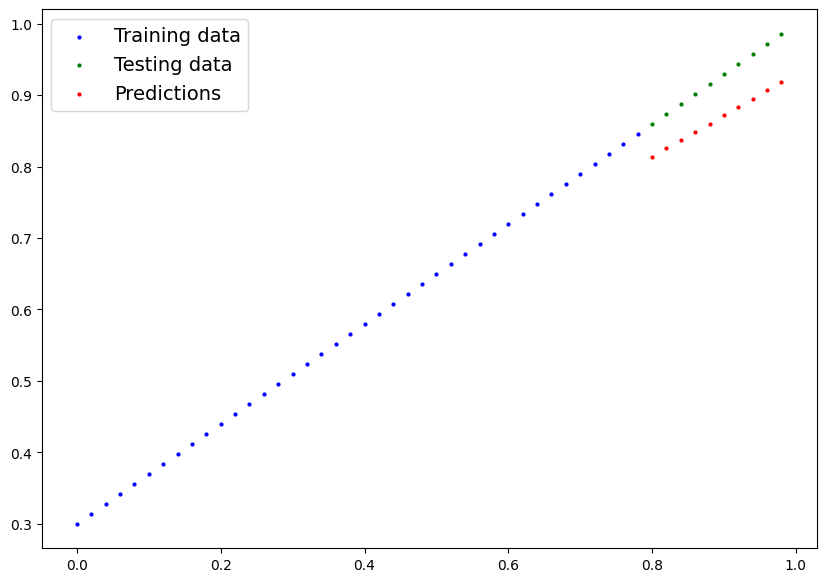

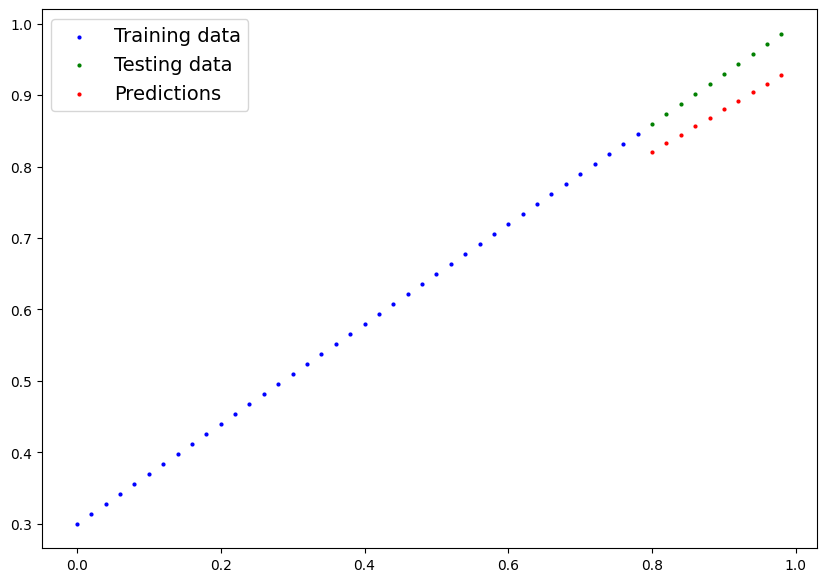

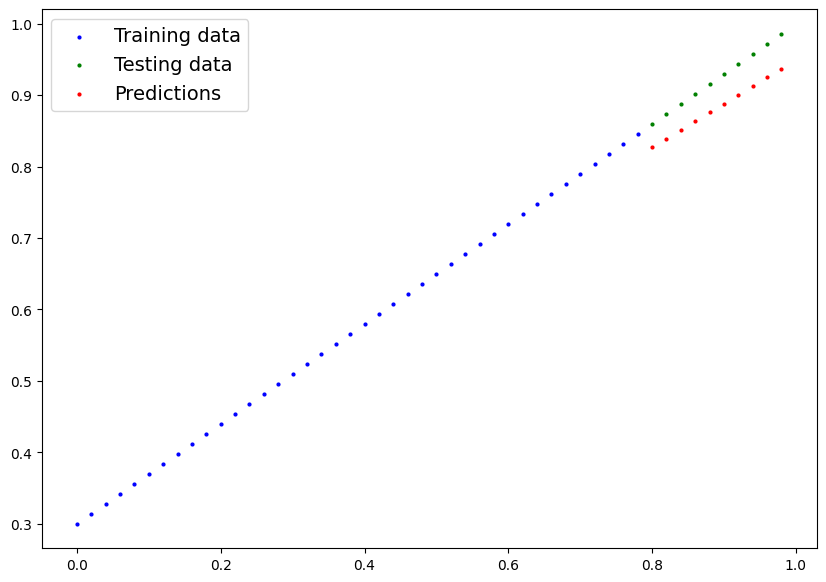

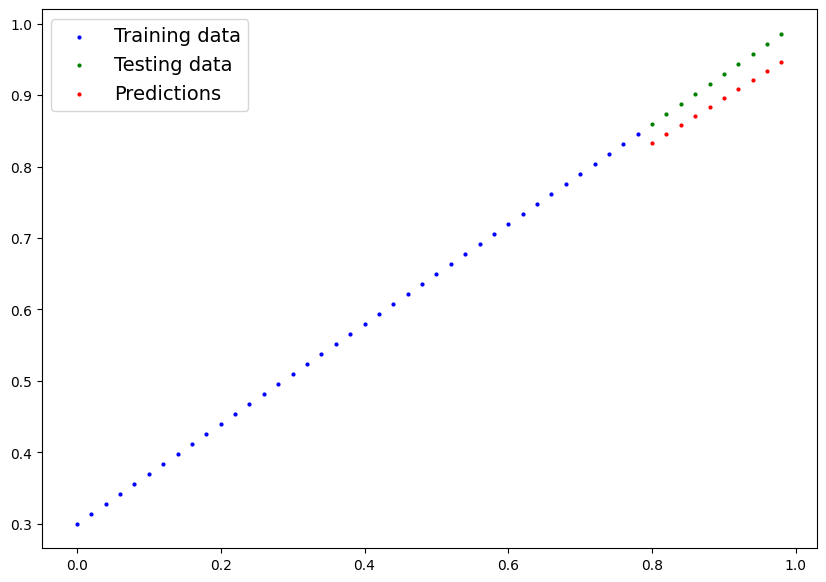

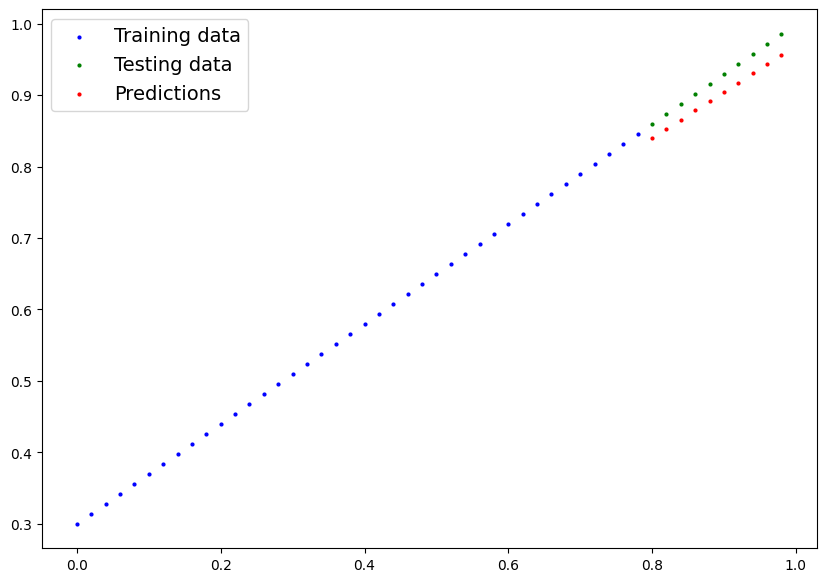

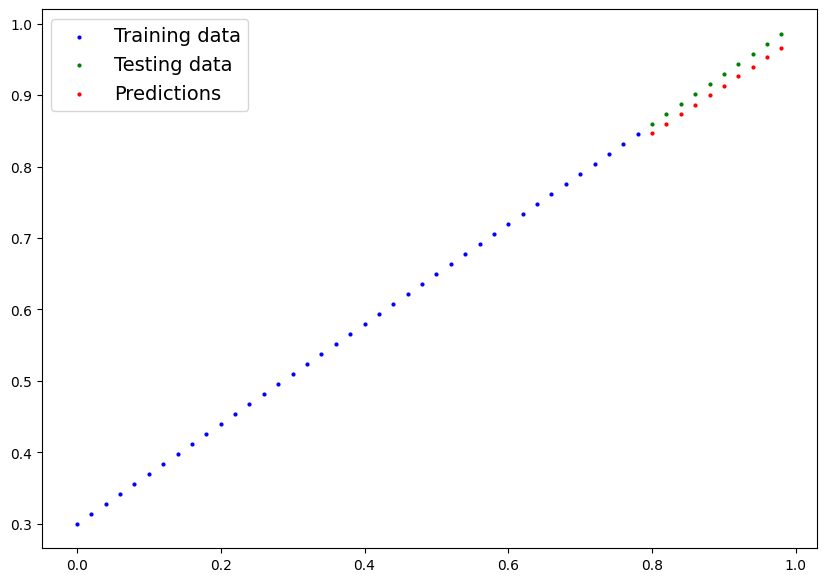

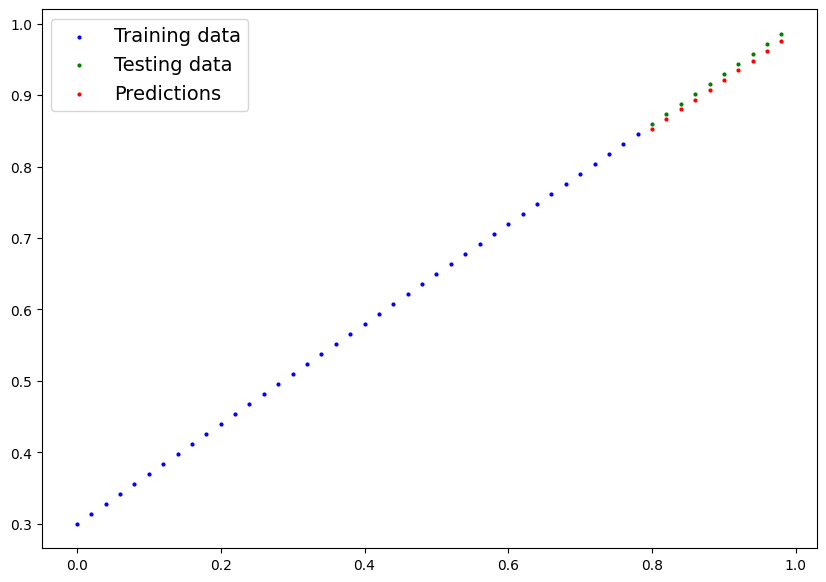

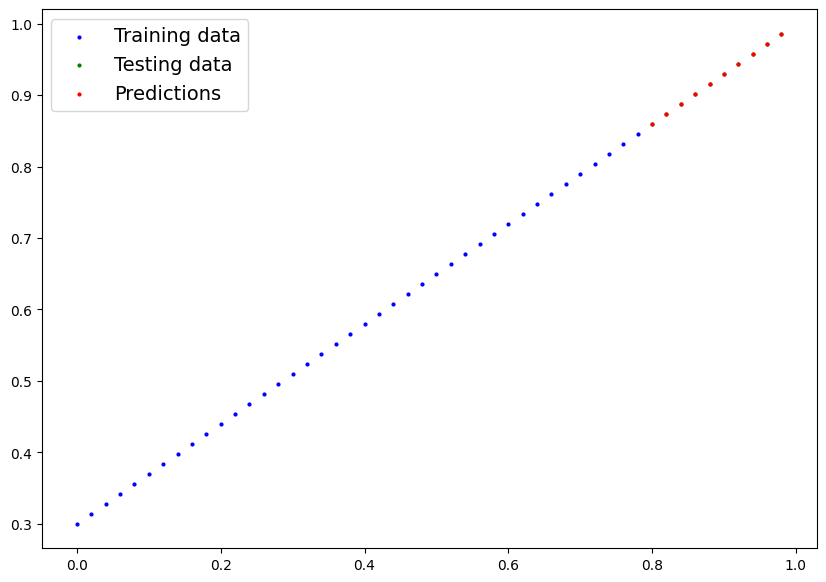

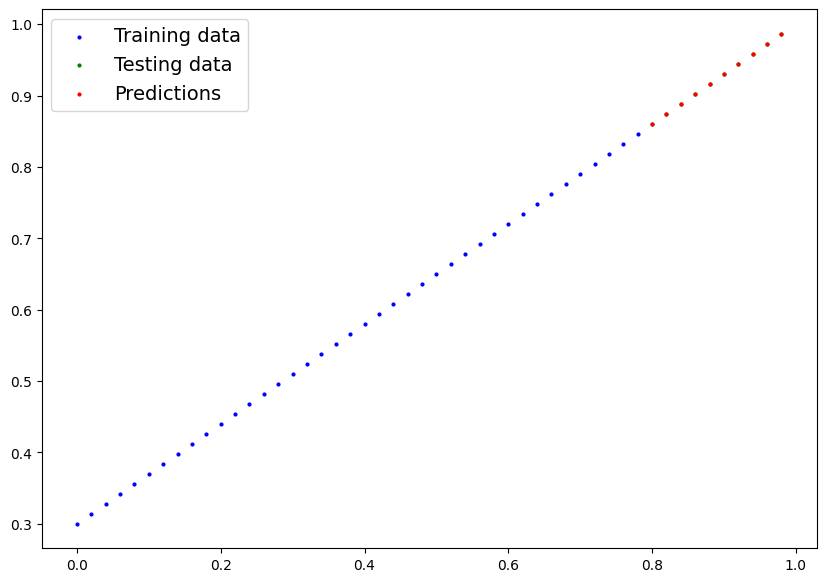

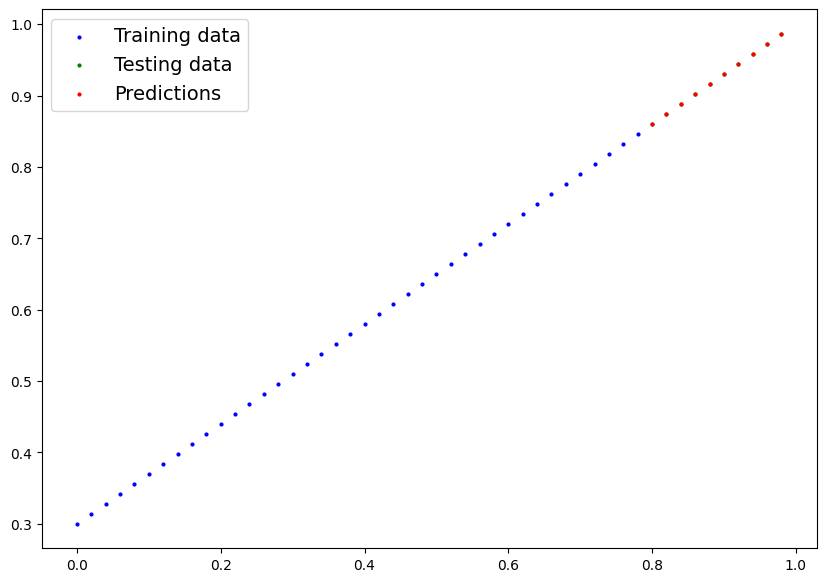

In [95]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 1000

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)


    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, Y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)
      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, Y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 100 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            plot_predictions(predictions=test_pred)

In [85]:
torch.tensor(
            0.3,requires_grad=True,
            dtype=torch.float)

tensor(0.3000, requires_grad=True)